<a href="https://colab.research.google.com/github/rushikeshnaik779/data_cleaning_projects/blob/main/103AirBnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 78.4MB/s]


In [ ]:
import zipfile 

z = zipfile.ZipFile('new-york-city-airbnb-open-data.zip', "r")
z.extractall()
z.close()

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
airbnb = pd.read_csv('./AB_NYC_2019.csv')
airbnb.head() 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# checking shape of the daatset 
print(f"Shape for the dataset {airbnb.shape}")

Shape for the dataset (48895, 16)


In [ ]:
print(f"Dtypes \n{airbnb.dtypes}")

Dtypes 
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [ ]:
print(f"Info:\n{airbnb.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# let's check for the null values present in the dataset 
print(f"Null values\n{airbnb.isna().sum()}")

Null values
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# removing the duplicates if any 
airbnb.duplicated().sum()

0

In [ ]:
airbnb.drop_duplicates(inplace=True)

In [ ]:
# let's drop the unnecessary columns 
airbnb.drop(['name', 'id', 'host_name', 'last_review'], axis=1, inplace=True)

In [ ]:
# examining changes 
airbnb.sample(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
14867,62787599,Brooklyn,Prospect-Lefferts Gardens,40.65799,-73.94924,Entire home/apt,98,4,15,0.49,2,341
31466,185022050,Brooklyn,Bensonhurst,40.61266,-73.98677,Entire home/apt,99,30,5,0.36,1,320
12292,19410959,Brooklyn,Bushwick,40.69914,-73.91471,Entire home/apt,215,3,0,NaN,1,0
38616,137358866,Manhattan,East Harlem,40.79422,-73.94383,Entire home/apt,70,30,2,0.36,103,219
3283,10124193,Manhattan,Upper East Side,40.77924,-73.95405,Entire home/apt,499,1,6,0.10,1,0


In [ ]:
# since we have so many review null .... replace them with 0 
airbnb.fillna({'reviews_per_month': 0}, inplace=True)
airbnb.reviews_per_month.isnull().sum()


0

In [ ]:
# Remove NaN values from the dataset

airbnb.isna().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
airbnb.dropna(how='any', inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

## let' observer the variables now 

In [ ]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


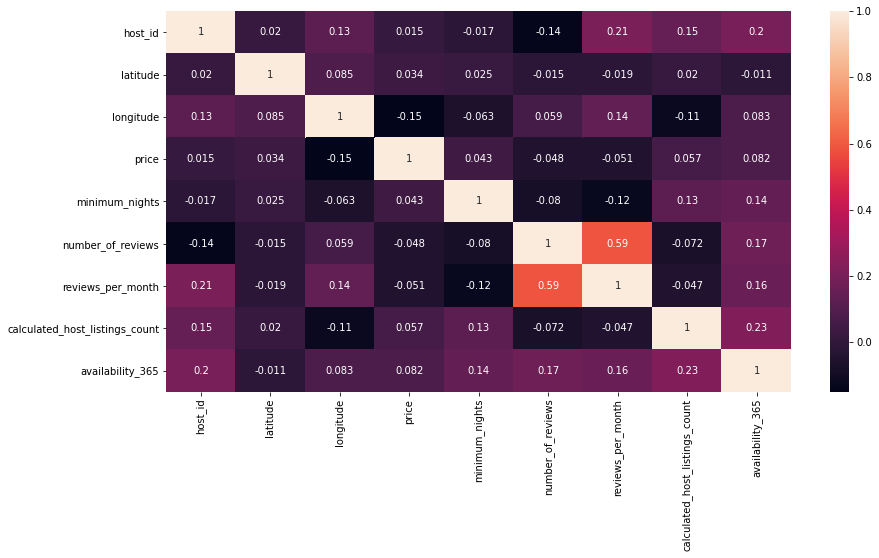

In [ ]:
# let's see the correlation between different variables 
corr = airbnb.corr()
print(airbnb.columns)
plt.figure(figsize=(14, 7))
sns.heatmap(corr, annot=True)
plt.show()


In [ ]:
airbnb.shape

(48895, 12)

### neighbourhood_group

In [ ]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

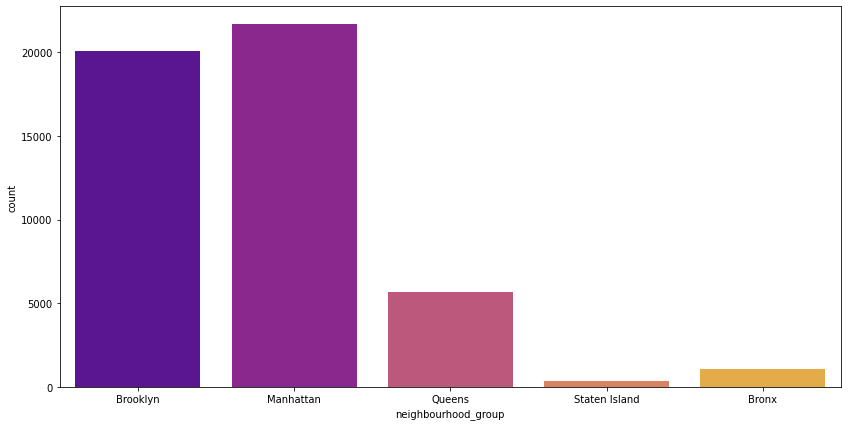

In [ ]:
plt.subplots(1, 1, figsize=(14, 7))
sns.countplot(airbnb['neighbourhood_group'], palette="plasma")
plt.show()

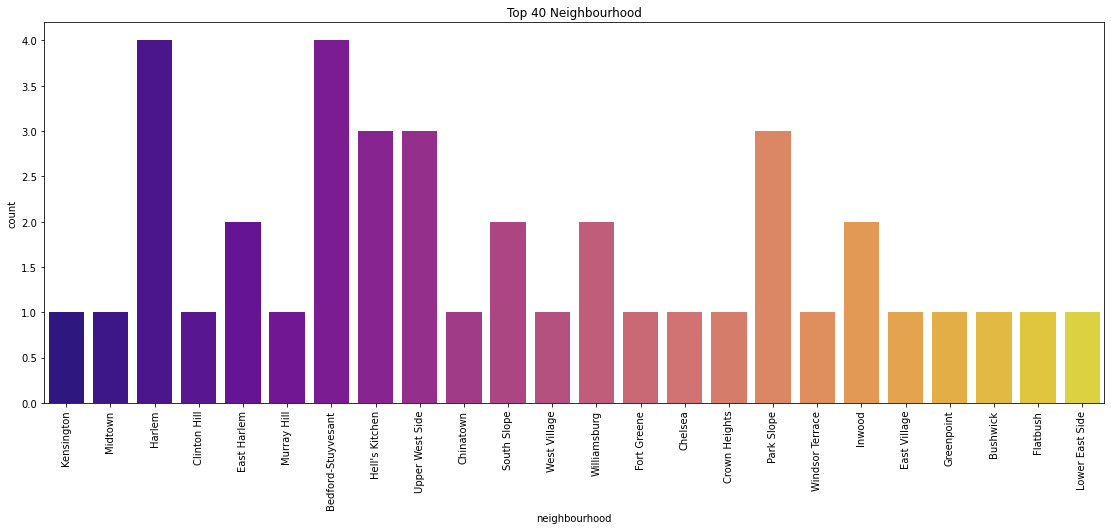

In [ ]:
plt.subplots(1, 1, figsize=(19, 7))

sns.countplot(airbnb['neighbourhood'][:40], palette='plasma')
plt.title('Top 40 Neighbourhood')
plt.xticks(rotation=90)
plt.show()

## Room Type 

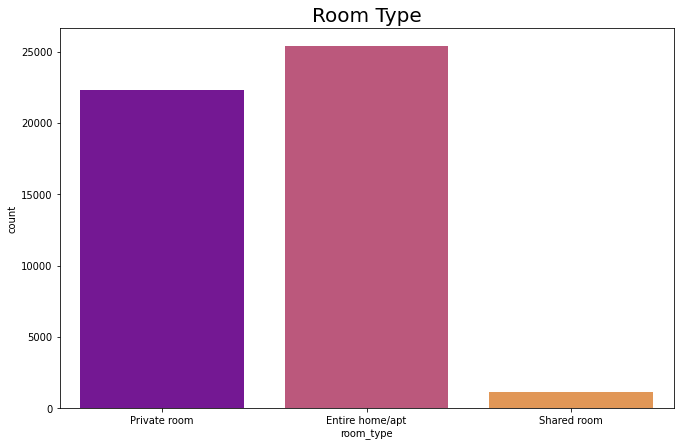

In [ ]:
# restaurant delivering online or not 
plt.subplots(1, 1, figsize=(11, 7))
sns.countplot(airbnb.room_type, palette="plasma")
plt.title("Room Type", size=20)
plt.show()

### let's undestand relations between different variables we have

Relationship between neighbour group and room availability

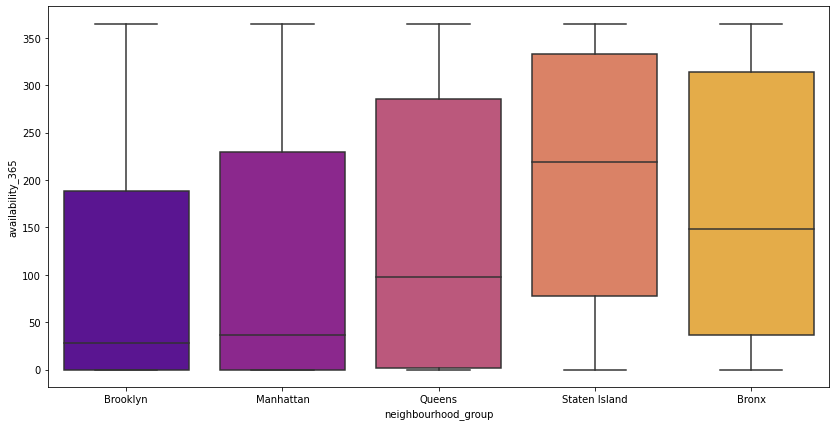

In [ ]:
plt.figure(figsize=(14, 7))
ax = sns.boxplot(data = airbnb, x='neighbourhood_group', y='availability_365', palette="plasma")
plt.show()

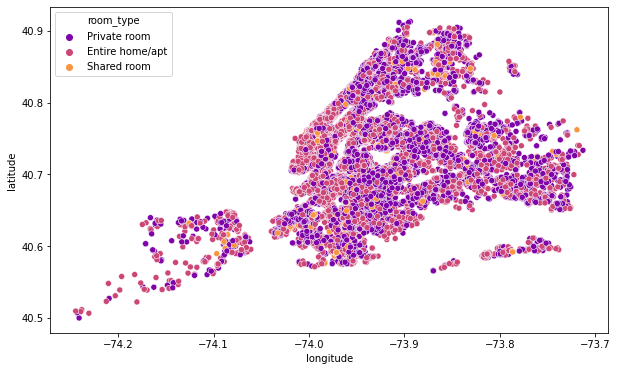

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type, palette='plasma')
plt.ioff()

### Neighbourhood Group 

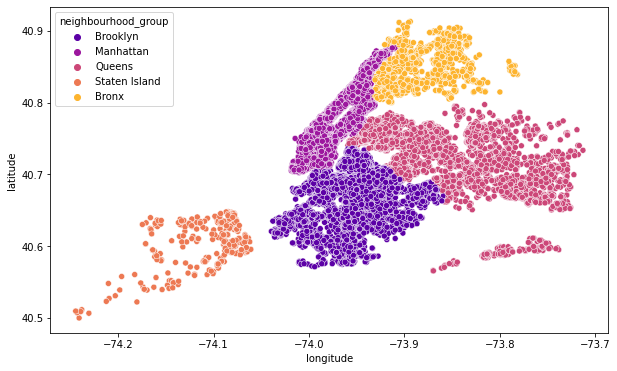

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group, palette='plasma')
plt.ioff()

### Availability

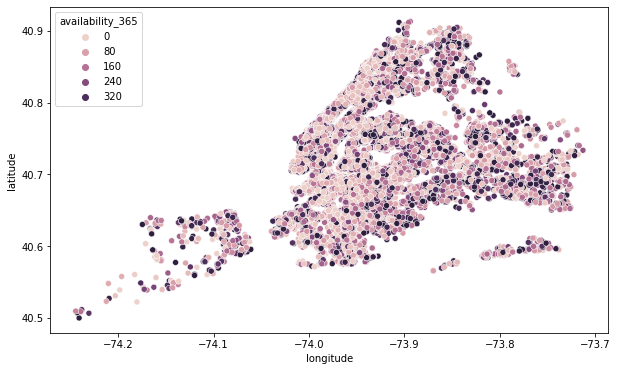

In [ ]:
# Room Availability 
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.ioff()

### TICKET PRICE 

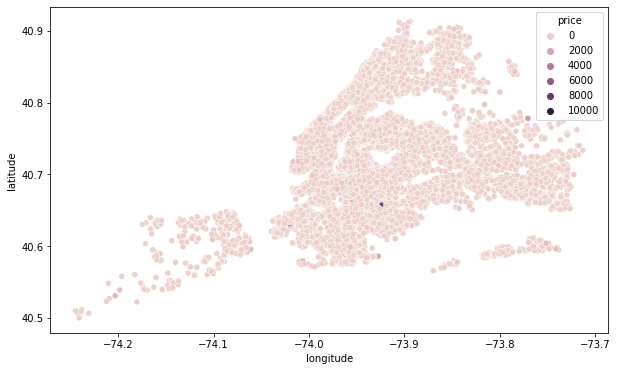

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.price)
plt.ioff()

## WordCloud

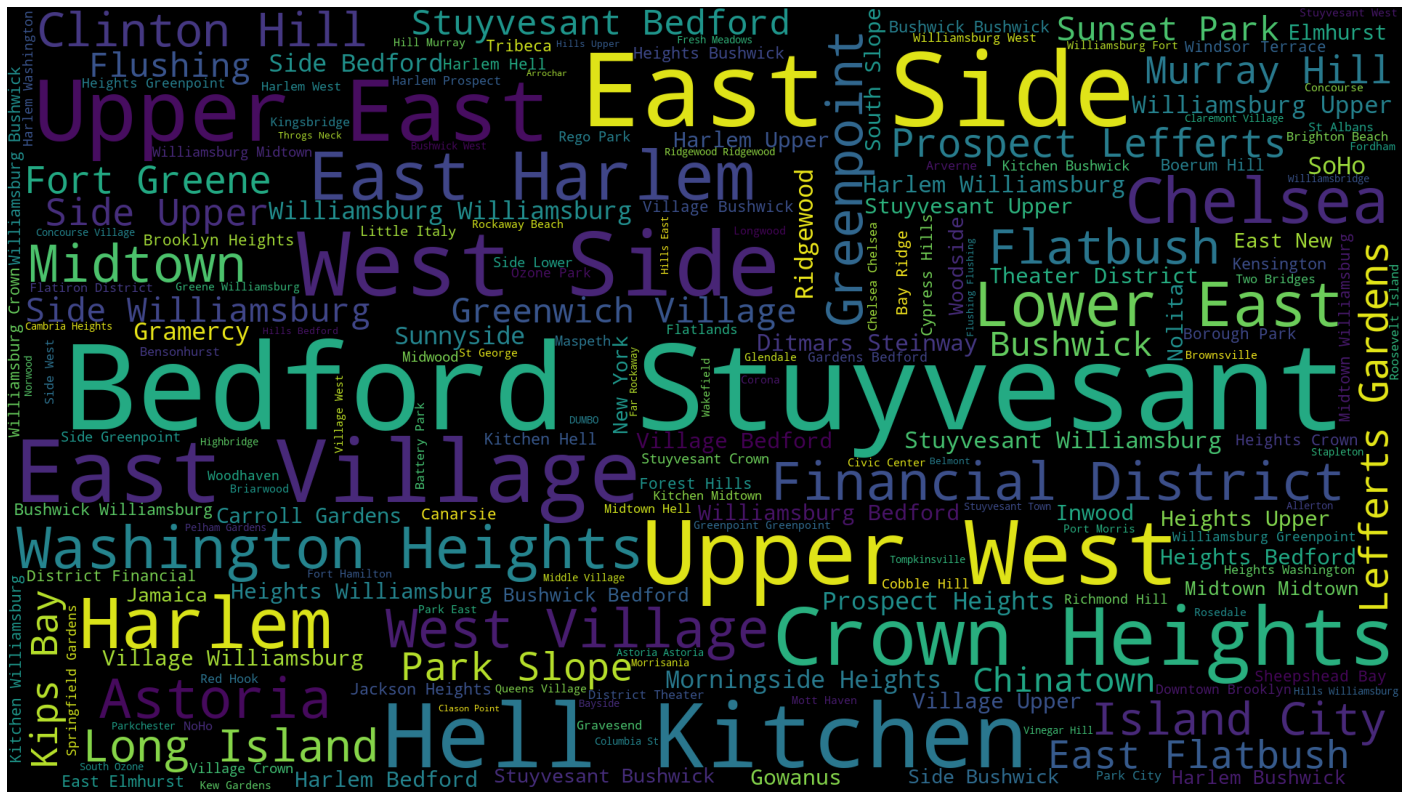

In [ ]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

# Regression Analysis 

In [ ]:
## Droping some columns which realy not going to help us predict the price
airbnb.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
#examing the changes
airbnb.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


In [ ]:
# let's encode the variable

def Encode_airbnb(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode_airbnb(airbnb.copy())

In [ ]:
airbnb_en.sample(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
23740,0,0,51,1,2,7
13576,1,1,160,1,1,0
43582,1,1,300,3,1,54
41869,1,1,50,2,1,51
18789,1,1,200,3,1,89


Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

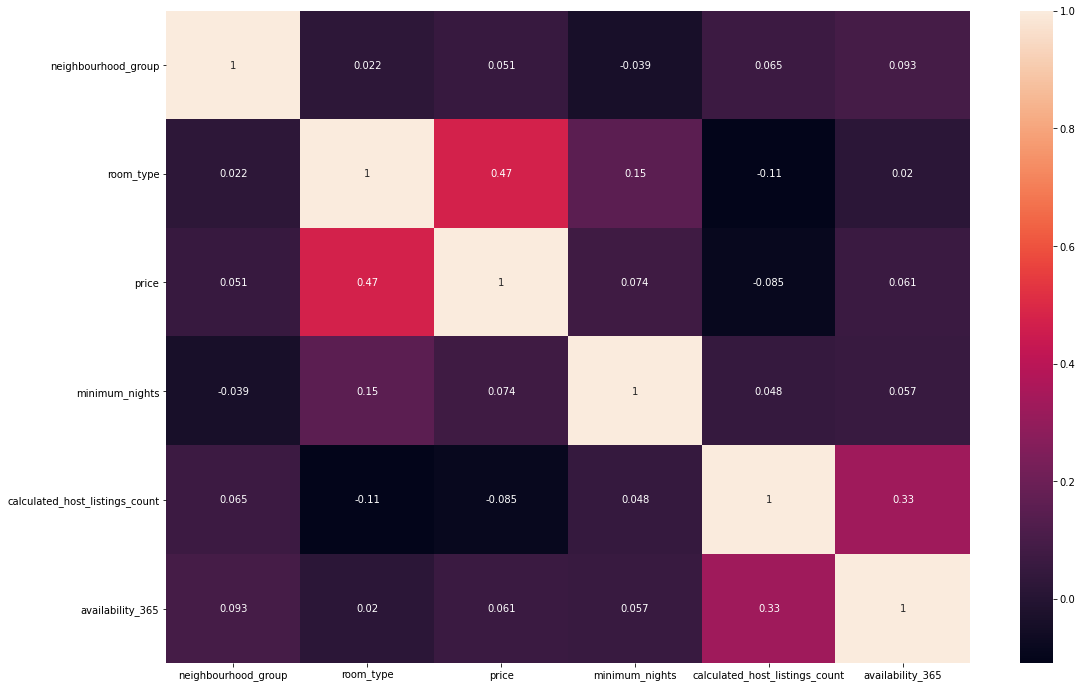

In [ ]:
#Get Correlation between different variables
corr = airbnb_en.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)
airbnb_en.columns

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [ ]:
X = airbnb_en.drop('price',  axis=1)
y = airbnb_en['price']

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# check the shapes of the data 
print(f'Shape of X_train, X_test {X_train.shape}, {X_test.shape}')

Shape of X_train, X_test (34226, 5), (14669, 5)


In [ ]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
r2_score(y_test,y_pred)

0.06899442831747504

In [ ]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.1, random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.2534153986765417

In [ ]:
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.1, random_state=105)
DTree=RandomForestRegressor()
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.23575007786127034